<a href="https://colab.research.google.com/github/NimsW20/TensorFlow-Tutorial/blob/main/Cats%26Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2024-06-17 01:38:41--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip.1’

cats_and_dogs.zip.1 100%[===================>]  67.43M  23.4MB/s    in 2.9s    

2024-06-17 01:38:44 (23.4 MB/s) - ‘cats_and_dogs.zip.1’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
replace cats_and_dogs/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, directory=train_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode='binary', shuffle=True)
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, directory=validation_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode='binary', shuffle=True)
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size, directory=test_dir, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                     class_mode=None, shuffle=False, follow_links=False)



#?????????????????????????????????????????????????????????????

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

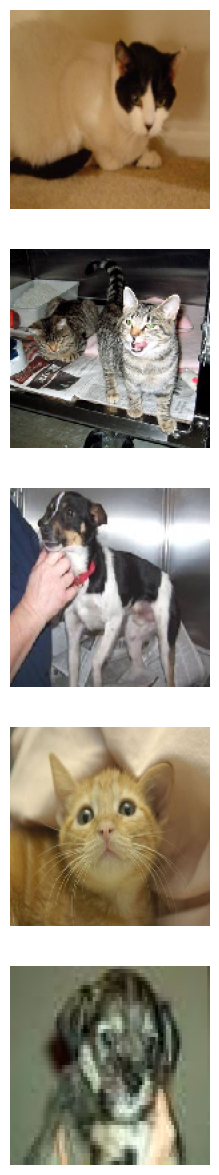

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,height_shift_range=0.2,
                                            shear_range=0.2, zoom_range=0.2, horizontal_flip=True, rescale=1./255,
                                            fill_mode='nearest')


Found 2000 images belonging to 2 classes.


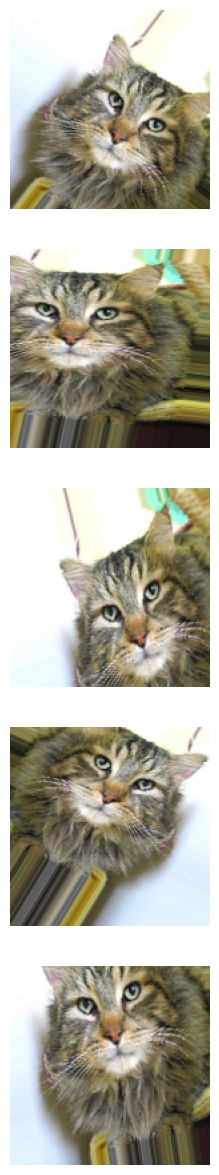

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
# 8
history = model.fit(train_data_gen, epochs=epochs, steps_per_epoch=(train_data_gen.samples//batch_size),
                    validation_data=val_data_gen, validation_steps= (val_data_gen.samples// batch_size))

Epoch 1/15
15/15 [==============================] - 24s 1s/step - loss: 0.8296 - accuracy: 0.5123 - val_loss: 0.6850 - val_accuracy: 0.5145
Epoch 2/15
15/15 [==============================] - 20s 1s/step - loss: 0.6930 - accuracy: 0.5069 - val_loss: 0.6747 - val_accuracy: 0.5525
Epoch 3/15
15/15 [==============================] - 17s 1s/step - loss: 0.6656 - accuracy: 0.5769 - val_loss: 0.6326 - val_accuracy: 0.6228
Epoch 4/15
15/15 [==============================] - 16s 1s/step - loss: 0.6407 - accuracy: 0.6116 - val_loss: 0.6071 - val_accuracy: 0.6641
Epoch 5/15
15/15 [==============================] - 19s 1s/step - loss: 0.6288 - accuracy: 0.6437 - val_loss: 0.6033 - val_accuracy: 0.6507
Epoch 6/15
15/15 [==============================] - 16s 1s/step - loss: 0.6083 - accuracy: 0.6704 - val_loss: 0.5931 - val_accuracy: 0.6819
Epoch 7/15
15/15 [==============================] - 16s 1s/step - loss: 0.6050 - accuracy: 0.6672 - val_loss: 0.5765 - val_accuracy: 0.6875
Epoch 8/15
15/15 [==

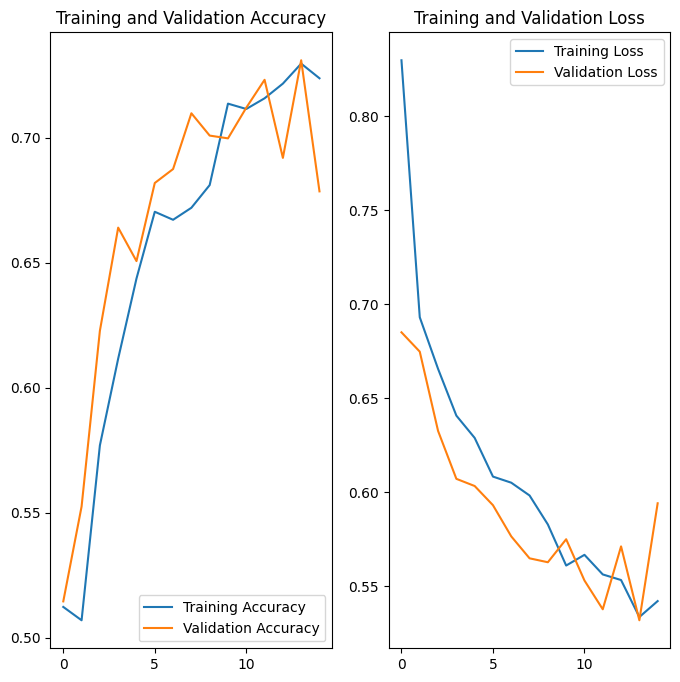

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#10
probabilities = model.predict(test_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# Predict the probabilities for the test images
probabilities = model.predict(test_data_gen)

# Convert probabilities to binary labels (0 for Cat, 1 for Dog)
predicted_classes = np.where(probabilities > 0.5, 1, 0)

# Function to plot images with their predicted labels
def plotImages(images_arr, probabilities):
    fig, axes = plt.subplots(5, 10, figsize=(20, 10))
    axes = axes.flatten()
    for img, ax, prob in zip(images_arr, axes, probabilities):
        ax.imshow(img)
        if prob > 0.5:
            label = f"Dog ({prob[0] * 100:.2f}%)"
        else:
            label = f"Cat ({(1 - prob[0]) * 100:.2f}%)"
        ax.set_title(label, fontsize=12)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get the images from the test data generator
test_images = []
for _ in range(len(test_data_gen)):
    imgs, _ = next(test_data_gen)
    test_images.extend(imgs)

# Ensure the number of images matches the number of predictions
test_images = np.array(test_images)
if len(test_images) > len(probabilities):
    test_images = test_images[:len(probabilities)]

# Plot the images with their predicted labels
plotImages(test_images, probabilities)


In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")